# Data importing and cleaning

In [ ]:
import pandas as pd

In [ ]:
# df_page = pd.read_csv('/content/packt amazon (filtered).csv')

In [ ]:
df = pd.read_csv("/content/book_details(1).csv")
df2 = pd.read_csv("/content/packt amazon (filtered).csv")

In [ ]:
# removing the URL columns
df.drop(['book_url', 'book_number_of_reviews_url', 'book_price_url'], axis=1, inplace=True)

In [ ]:
df = df.dropna(subset=['book_ratings', 'book_number_of_reviews'])


In [ ]:
df2.drop('book_date', axis = 1, inplace = True)

In [ ]:
df2.head()

,book_name,book_Price,book_reviews,book_rating,book_discount,book_author
0,Getting Started with Google BERT: Build and tr...,"2,464",69,4.1 out of 5 stars,(20% off),by Sudharsan Ravichandiran | 22 January 2021
1,AWS for Solutions Architects: Design your clou...,"2,464",79,4.3 out of 5 stars,(20% off),by Alberto Artasanchez | 19 February 2021
2,"LEARNING AWS 2/ED: Design, build, and deploy r...","2,782",14,4.3 out of 5 stars,(20% off),by Amit Shah Aurobindo Sarkar | 1 January 2018
3,SQL for Data Analytics - Third Edition: Harnes...,"2,703",1,5.0 out of 5 stars,(20% off),"by Jun Shan, Matt Goldwasser, et al. | 29 Augu..."
4,Programming with CodeIgniterMVC,"2,226",6,2.6 out of 5 stars,(20% off),by Eliahou Orr and Yehuda Zadik | 23 September...


In [ ]:
df.head()

,book_name,book_ratings,book_number_of_reviews,book_price,book_authors
2,Python 3 Object-Oriented Programming: Build ro...,4.4 out of 5 stars,201.0,"4,770",by Dusty Phillips | 30 October 2018
3,Learning RStudio for R Statistical Computing,3.7 out of 5 stars,13.0,"1,828",by Mark van der Loo and Edwin de Jonge | 24 De...
5,Socket.io Real-time Web Application Development,3.2 out of 5 stars,4.0,"2,243",by Rohit Rai | 22 February 2013
6,eZ Publish 4: Enterprise Web Sites Step-by-Step,1.0 out of 5 stars,1.0,220,by Francesco Trucchia and Francesco Fullone | ...
7,Robot Framework Test Automation,2.9 out of 5 stars,17.0,"1,828",by Sumit Bisht | 25 October 2013


In [ ]:
df2.rename(columns = {'book_Price':'book_price', 'book_rating':'book_ratings','book_author':'book_authors','book_reviews':'book_number_of_reviews' }, inplace = True)

In [ ]:
df3 = pd.concat([df,df2], axis = 0)

In [ ]:
df4 = df3.drop_duplicates()

In [ ]:
df4.head()

,book_name,book_ratings,book_number_of_reviews,book_price,book_authors,book_discount
2,Python 3 Object-Oriented Programming: Build ro...,4.4 out of 5 stars,201.0,"4,770",by Dusty Phillips | 30 October 2018,NaN
3,Learning RStudio for R Statistical Computing,3.7 out of 5 stars,13.0,"1,828",by Mark van der Loo and Edwin de Jonge | 24 De...,NaN
5,Socket.io Real-time Web Application Development,3.2 out of 5 stars,4.0,"2,243",by Rohit Rai | 22 February 2013,NaN
6,eZ Publish 4: Enterprise Web Sites Step-by-Step,1.0 out of 5 stars,1.0,220,by Francesco Trucchia and Francesco Fullone | ...,NaN
7,Robot Framework Test Automation,2.9 out of 5 stars,17.0,"1,828",by Sumit Bisht | 25 October 2013,NaN


In [ ]:
df4.shape

(1152, 6)

In [ ]:
df4[['book_author','book_date']]= df4['book_authors'].str.split('|', n = 1, expand = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df4.drop('book_authors', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
tmp = df4['book_ratings'].str.split(' ', n = 1, expand = True)


In [ ]:
# df5.head()

In [ ]:
df5 = df4.copy()

In [ ]:
tmp = df4['book_ratings'].str.split(' ', n = 1, expand = True)
df5['book_ratings'] = tmp[0].astype('float')

In [ ]:
tmp = df5['book_discount'].str.split('%', n = 1, expand = True)
tmp1 = tmp.iloc[:,0].str.split('(', n = 1, expand = True)

In [ ]:
df5['book_discount'] = tmp1.iloc[:,1].astype('float')

In [ ]:
df5.book_discount.fillna(0.0, inplace = True)

In [ ]:
df5.isna().sum()

book_name                  0
book_ratings              64
book_number_of_reviews    64
book_price                11
book_discount              0
book_author                0
book_date                  0
dtype: int64

In [ ]:
df5.dropna(inplace = True)

In [ ]:
df5.isna().sum()

book_name                 0
book_ratings              0
book_number_of_reviews    0
book_price                0
book_discount             0
book_author               0
book_date                 0
dtype: int64

In [ ]:
df5.to_csv('combined_data_packt.csv',index = False)

In [ ]:
cdata = pd.read_csv('/content/combined_data_packt.csv')

In [ ]:
cdata['book_price'] = cdata['book_price'].str.replace(",","")
cdata['book_number_of_reviews'] = cdata['book_number_of_reviews'].str.replace(",","")
cdata['book_price'] = cdata['book_price'].astype('float')
cdata['book_number_of_reviews'] = cdata['book_number_of_reviews'].astype('float')
cdata['book_price'] = cdata['book_price'].astype('float')

In [ ]:
cdata[['dis','day','month','year']] = cdata['book_date'].str.split(' ', n = 3, expand = True)
cdata.drop(['dis', 'book_date'], axis = 1, inplace = True)
cdata2 = cdata.drop([549, 701,1023])
cdata2['year']  = cdata2['year'].astype('int')
cdata2['day'] = cdata2['day'].astype('int')
cdata2['years_launched'] = 2022 - cdata2['year']

In [ ]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   book_name               1077 non-null   object 
 1   book_ratings            1077 non-null   float64
 2   book_number_of_reviews  1077 non-null   float64
 3   book_price              1077 non-null   float64
 4   book_discount           1077 non-null   float64
 5   book_author             1077 non-null   object 
 6   day                     1077 non-null   object 
 7   month                   1077 non-null   object 
 8   year                    1077 non-null   object 
dtypes: float64(4), object(5)
memory usage: 75.9+ KB


# EDA

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cdata2

NameError: ignored

In [ ]:
def Plot_EDA(df):

  df.describe()

  sns.pairplot(df)

  correlations = df.corr().abs()
  mask=np.triu(np.ones_like(correlations))

  fig, ax = plt.subplots(1,1, figsize=(16,12))
  sns.heatmap(correlations, ax=ax, mask=mask, cmap='YlOrBr')
  ax.set_title("Correlation of features")
  plt.show()


Plot_EDA(cdata2)


In [ ]:
sns.pairplot(cdata2)


In [ ]:
correlations = cdata2.corr().abs()
mask=np.triu(np.ones_like(correlations))

fig, ax = plt.subplots(1,1, figsize=(16,12))
sns.heatmap(correlations, ax=ax, mask=mask, cmap='YlOrBr')
ax.set_title("Correlation of features")
plt.show()


In [ ]:
cdata2.head()

In [ ]:
sns.boxplot(cdata2['book_price'])

In [ ]:
cdata2.book_name.iloc[18]


In [ ]:
cdata2['book_author'].nunique()

# NLP

## keyword from title

In [ ]:
!pip install keybert
from keybert import KeyBERT

In [ ]:
kw_model = KeyBERT(model='all-mpnet-base-v2')

In [ ]:
def get_keyword(text):  
  
  keywords = kw_model.extract_keywords(text, 

                                      keyphrase_ngram_range=(1, 1), 

                                      stop_words='english', 

                                      highlight=False,

                                      top_n=1)

  keywords_list= list(dict(keywords).keys())

  return keywords_list


In [ ]:
key = []

In [ ]:
# for book in cdata2.book_name:
#   key.append(get_keyword(book))



In [ ]:
cdata2['keyword2'] = pd.Series(key).astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
cdata2.to_csv('tmp_key2.csv', index = False)

## review analysis

In [ ]:
packt_reviews = pd.read_csv('/content/packt reviews (15 pages).csv')

In [ ]:
packt_reviews['book_reviewer_reviewText'] = packt_reviews.book_reviewer_reviewText.fillna('missing')

In [ ]:
tmp4 = packt_reviews['book_reviewer_rating'].str.split(' ', n = 1, expand = True)
packt_reviews['book_reviewer_rating'] = tmp4[0].astype('float')

*** Rating distribution ***
5.0    322
4.0     88
1.0     74
3.0     73
2.0     59
Name: book_reviewer_rating, dtype: int64


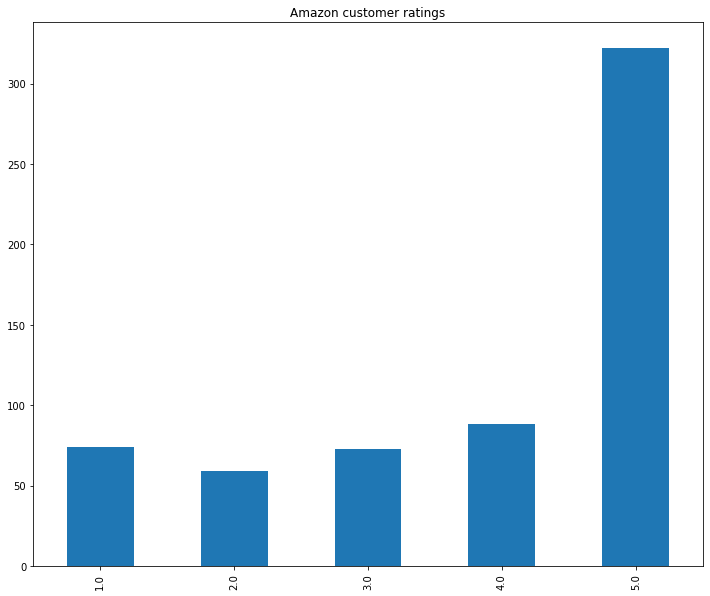

In [ ]:
from matplotlib import pyplot
%matplotlib inline

star = packt_reviews.book_reviewer_rating	.value_counts()
print("*** Rating distribution ***")
print(star)
star.sort_index(inplace=True)
star.plot(kind='bar',title='Amazon customer ratings',figsize=(12,10),style='Solarize_Light2')

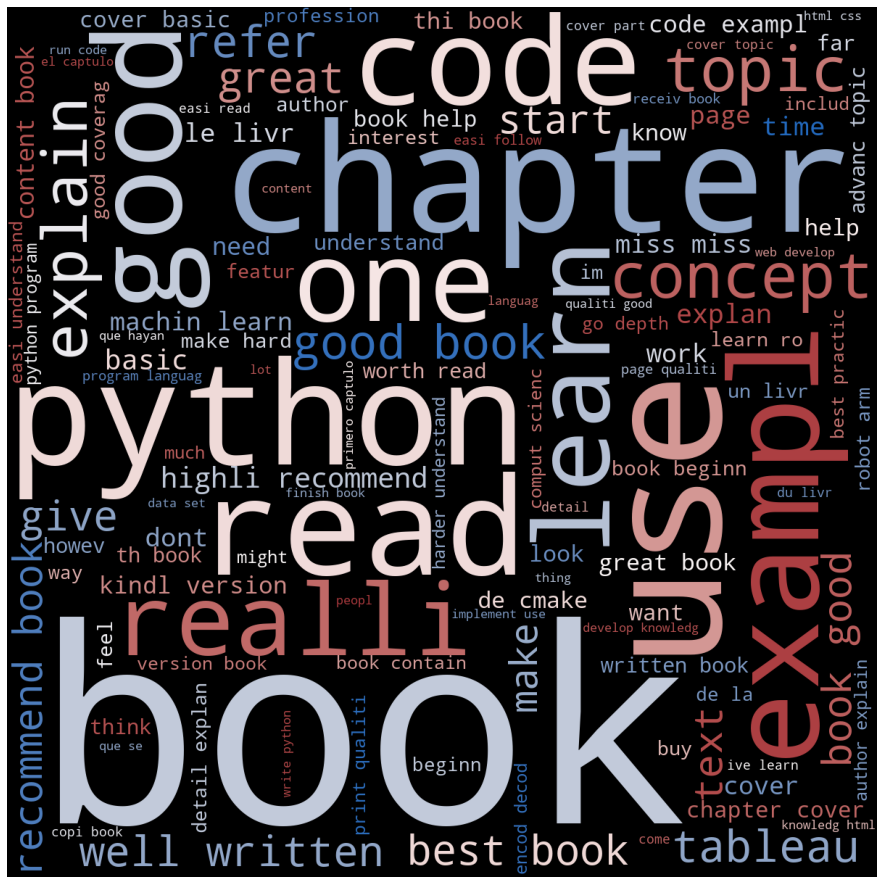

In [ ]:
from wordcloud import WordCloud

text=' '.join(packt_reviews.cleaned_reviews)
def plot_wordcloud(text):
  plt.rcParams['figure.figsize']=(16,16)
  wordcloud=WordCloud(background_color='black', colormap='vlag', 
                      width=1200, height=1200, max_words=121).generate(text)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

plot_wordcloud(text)

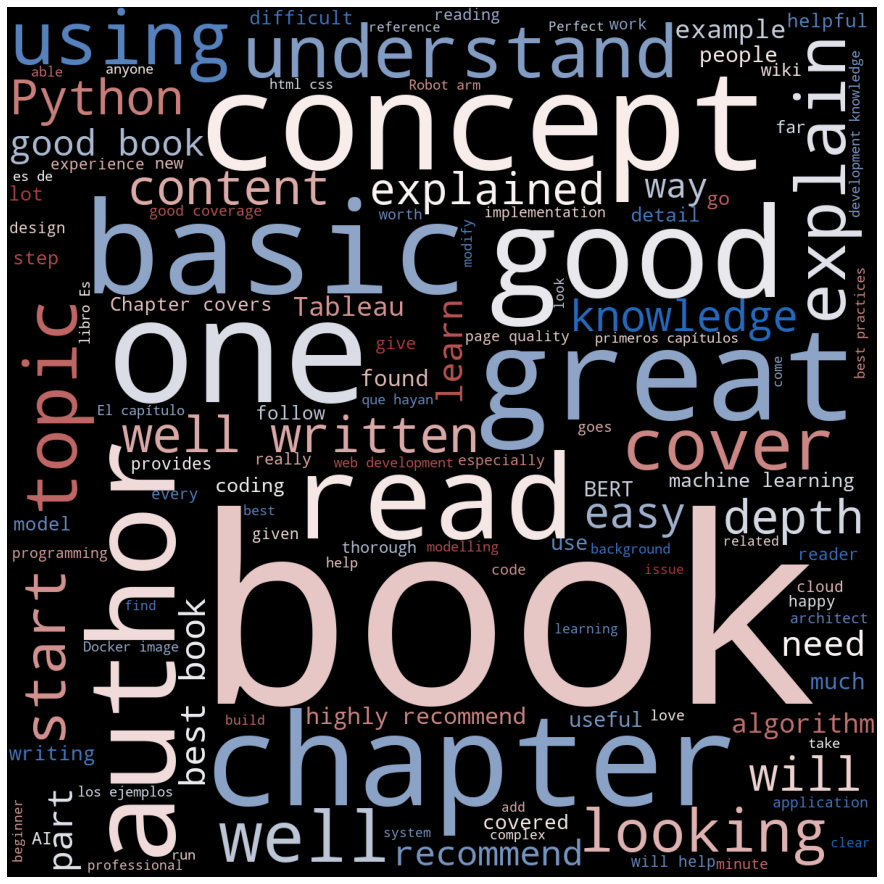

In [ ]:

text1=' '.join(packt_reviews[packt_reviews.book_reviewer_rating==5].book_reviewer_reviewText)
plot_wordcloud(text1)

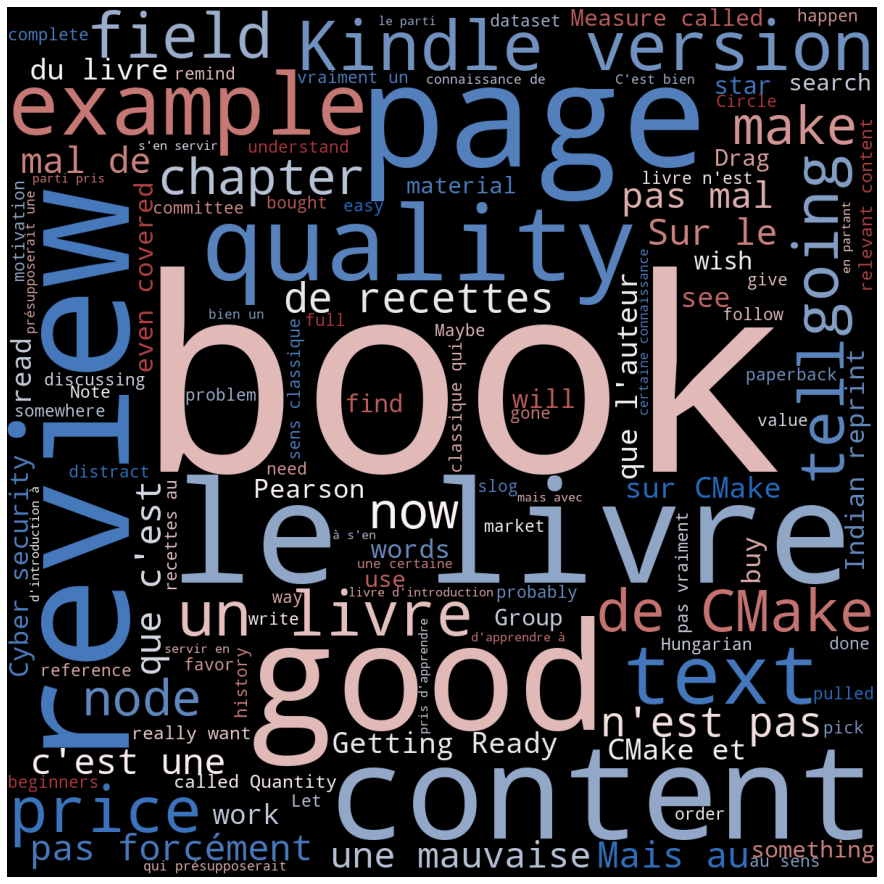

In [ ]:

text2=' '.join(packt_reviews[packt_reviews.book_reviewer_rating==3].book_reviewer_reviewText)
plot_wordcloud(text2)

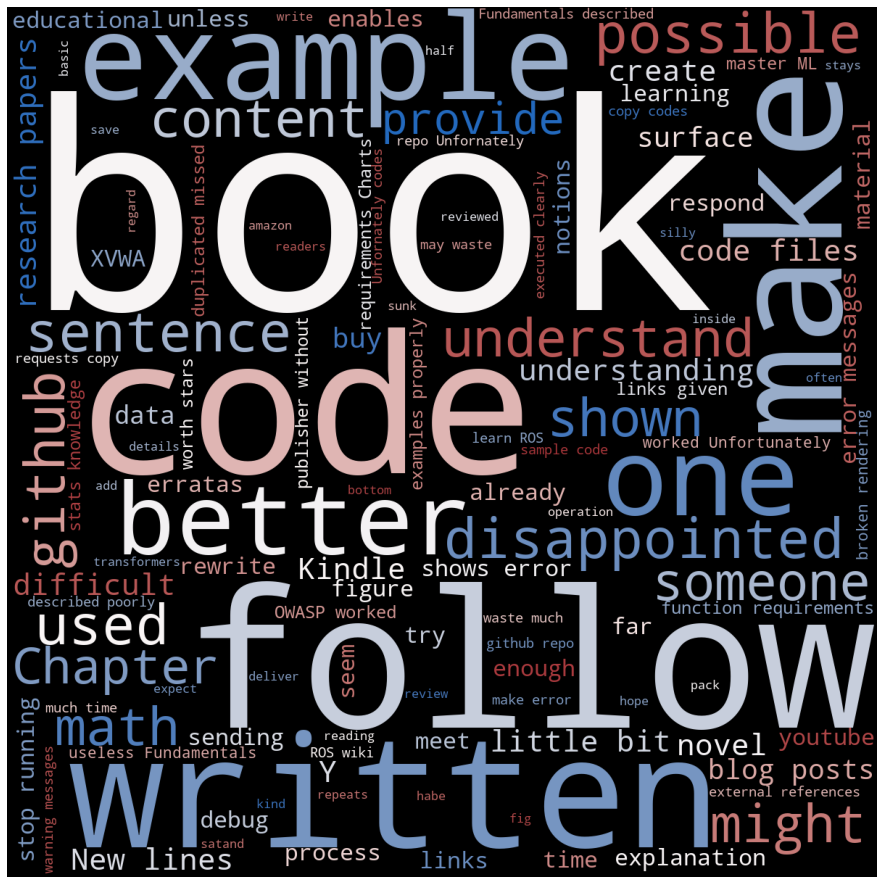

In [ ]:

text3=' '.join(packt_reviews[packt_reviews.book_reviewer_rating==1].book_reviewer_reviewText)
plot_wordcloud(text3)

## setup 

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [ ]:
STOPWORDS=stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews
import string   
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned
packt_reviews['cleaned_reviews']=packt_reviews['book_reviewer_reviewText'].apply(lambda x:clean_text(x))

In [ ]:
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [ ]:
from matplotlib import rcParams
from collections import Counter

In [ ]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [ ]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

In [ ]:
reviews_bigrams=[" ".join(generateNGram(review,2)) for review in packt_reviews.cleaned_reviews]

In [ ]:
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in packt_reviews[packt_reviews['book_reviewer_rating']>3].cleaned_reviews]

In [ ]:
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in packt_reviews[packt_reviews['book_reviewer_rating']3].cleaned_reviews]

In [ ]:
positive_reviews_trigrams=[" ".join(generateNGram(review,3)) for review in packt_reviews[packt_reviews['book_reviewer_rating']>3].cleaned_reviews]

In [ ]:
negative_reviews_trigrams=[" ".join(generateNGram(review,3)) for review in packt_reviews[packt_reviews['book_reviewer_rating']<3].cleaned_reviews]

# EDA reviews continue

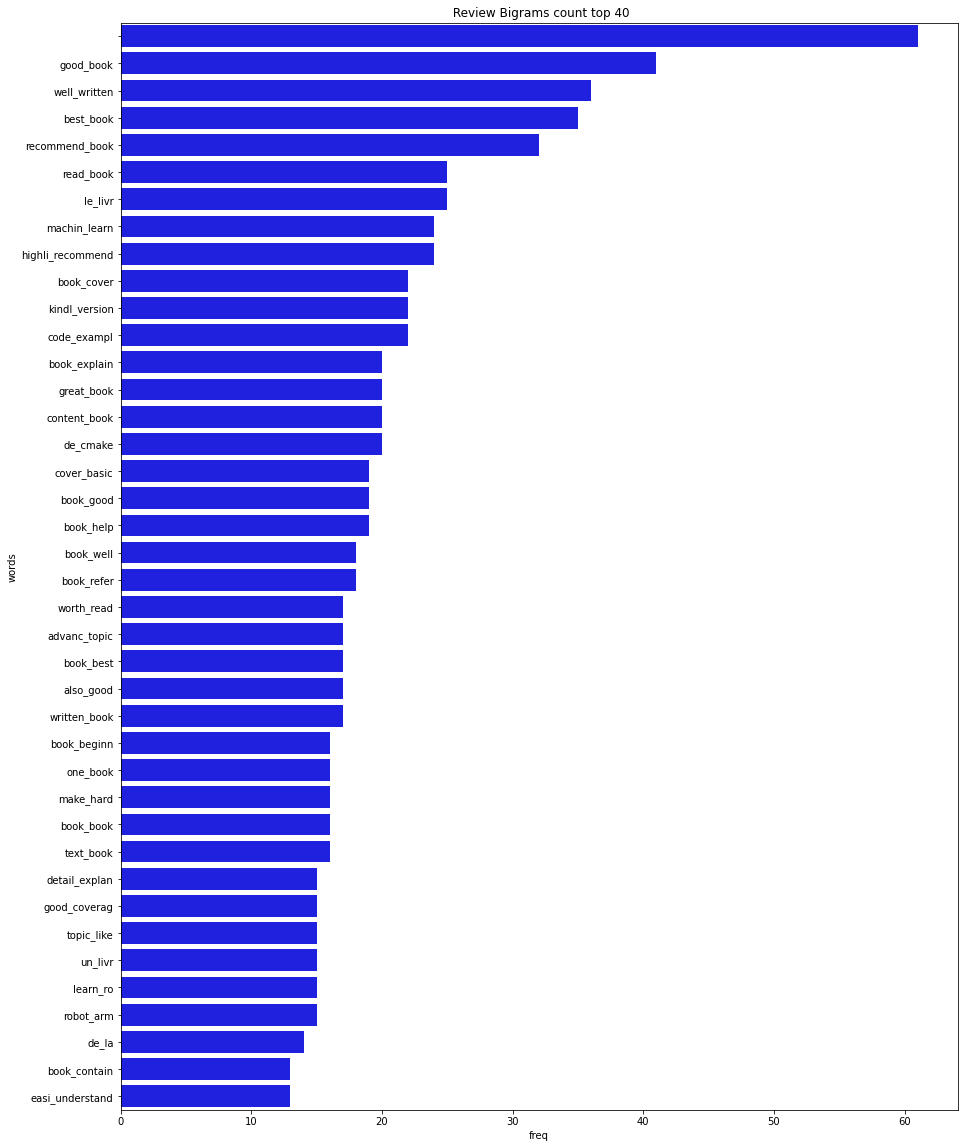

In [ ]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots()
fig.subplots_adjust(wspace=1)
plotMostCommonWords(reviews_bigrams,40," Review Bigrams count",axis=ax)


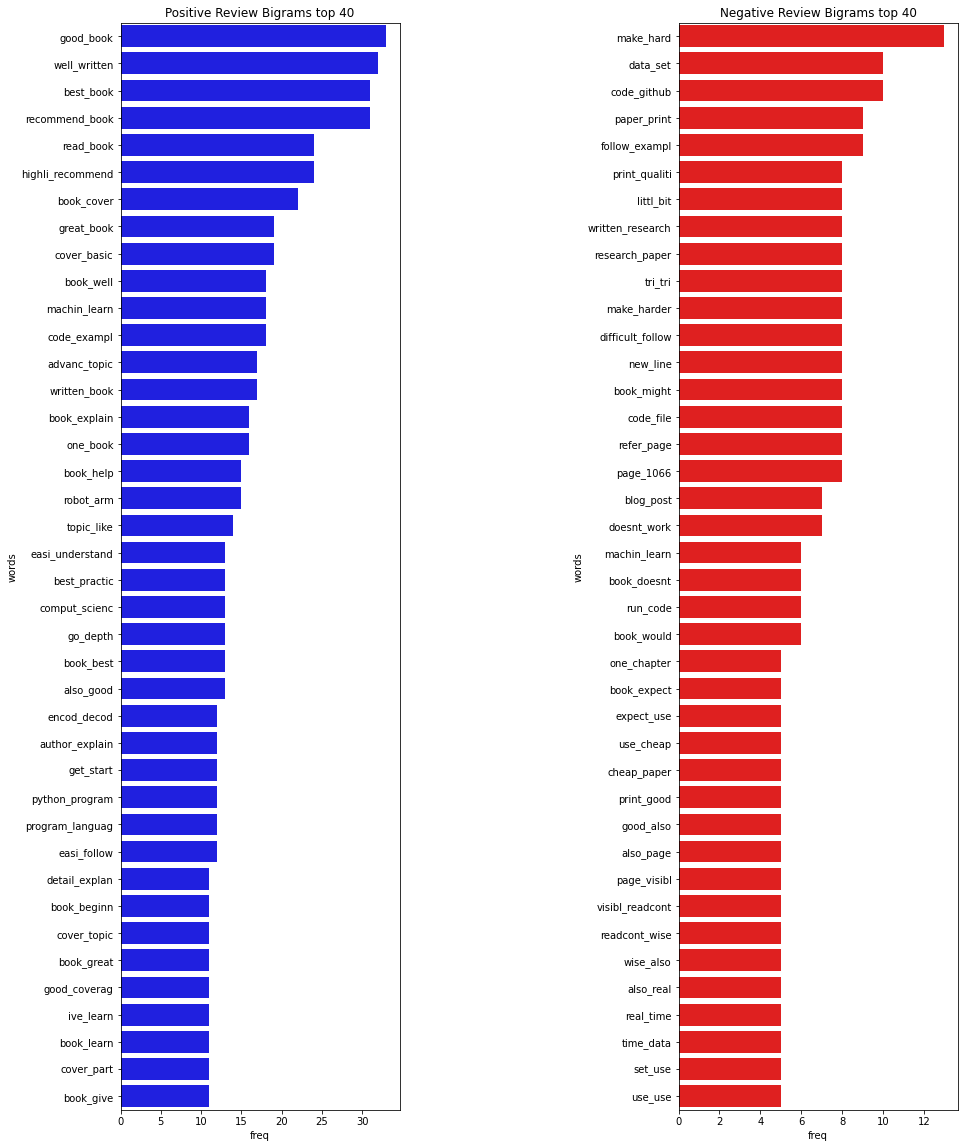

In [ ]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])

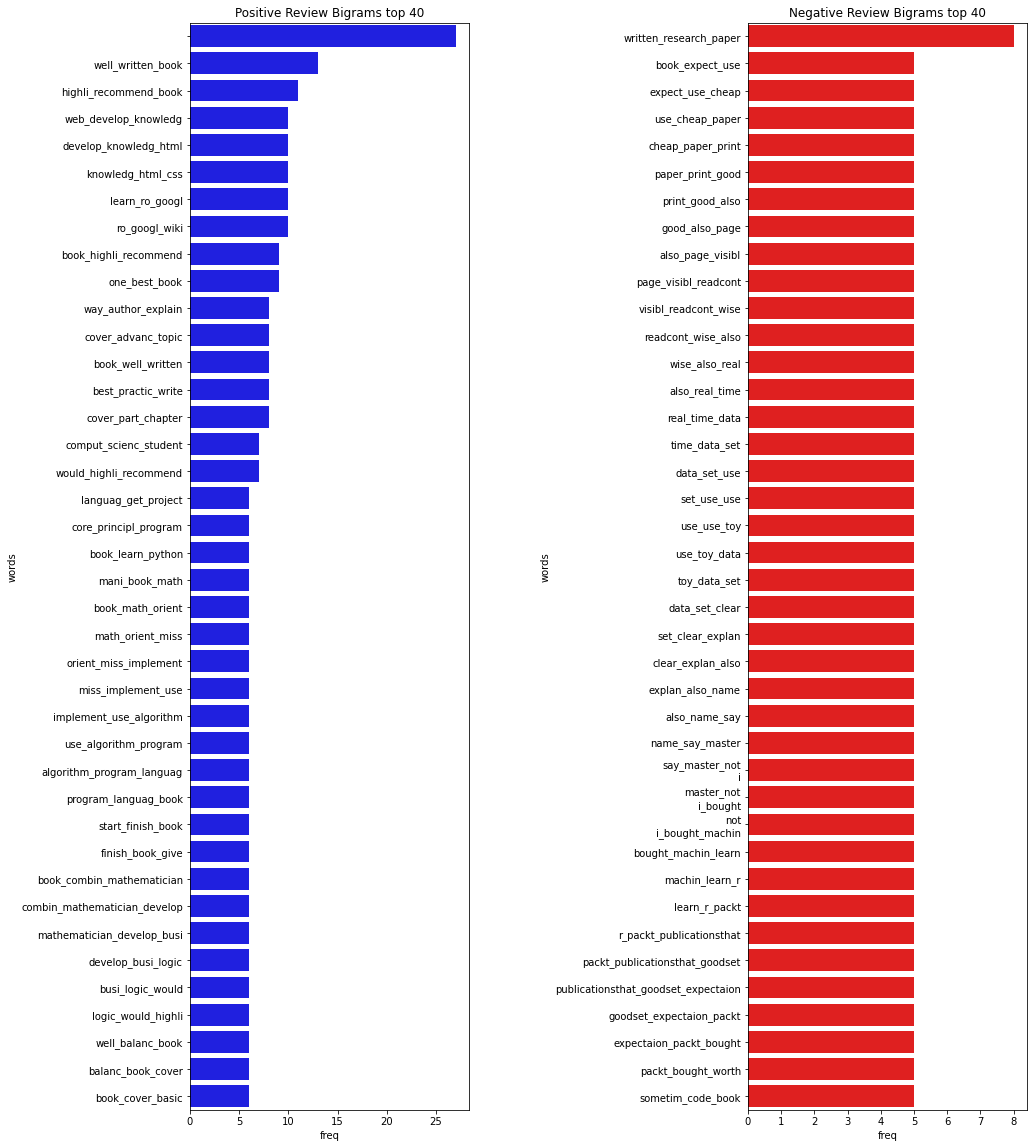

In [ ]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_trigrams,40,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_trigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])

In [ ]:
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification, TextClassificationPipeline

# Load fine-tuned MRC model by HuggingFace Model Hub
HUGGINGFACE_MODEL_PATH = "bespin-global/klue-roberta-small-3i4k-intent-classification"
loaded_tokenizer = RobertaTokenizerFast.from_pretrained(HUGGINGFACE_MODEL_PATH )
loaded_model = RobertaForSequenceClassification.from_pretrained(HUGGINGFACE_MODEL_PATH )

# using Pipeline
text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    return_all_scores=True
)




/usr/local/lib/python3.7/dist-packages/transformers/pipelines/text_classification.py:90: UserWarning: `return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality
  "`return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality", UserWarning


In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

In [ ]:
# function to classify 

def classify_sentence(text):
  preds_list = text_classifier(text)
  best_pred = preds_list[0]
  best_pred = pd.DataFrame(best_pred)
  best_pred.set_index('label')
  confc = best_pred.score.max()
  max = best_pred.score.idxmax()
  clas = best_pred.label.iloc[max]
  sentiment = sentiment_analysis(text)
  sentiment0 =sentiment[0]['label']
  confs = sentiment[0]['score']
  return clas, confc, sentiment0, confs


# DEMO

#"is this book for beginners..?"
#What kind of operation is shown in fig. 1.18?
# Received Book with teared covered.
# why is the book structured like that ?
#A Perfect treat to AWS Cloud Lovers!


In [ ]:
text = "A Perfect treat to AWS Cloud Lovers!"
clas, confc, sentiment0, confs = classify_sentence(text)
print(clas, confc, sentiment0, confs)

statement 0.9897257685661316 POSITIVE 0.9988704323768616


In [ ]:
best_pred

,label,score
0,fragment,0.000248
1,statement,0.985341
2,question,0.000511
3,command,0.002226
4,rhetorical question,0.009262
5,rhetorical command,0.002199
6,intonation-dependent utterance,0.000213


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
packt_reviews['sentences'] = 0
for i in range(0,packt_reviews.shape[0]):
  packt_reviews['sentences'][i] = sent_tokenize(packt_reviews['book_reviewer_reviewText'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if len(key) != self.ndim:


In [ ]:
packt_reviews_sent = packt_reviews.explode("sentences").reset_index(drop=True)
packt_reviews_sent.dropna(inplace = True)
packt_reviews_sent['clas'] = 'na'
packt_reviews_sent['confc'] = 0
packt_reviews_sent['sentiment0'] = 'na'
packt_reviews_sent['confs'] = 0


In [ ]:
# for i in range(0,100):
#    try :
#     clas, confc, sentiment0, confs = classify_sentence(packt_reviews_sent['sentences'][i])
#     packt_reviews_sent['clas'].iloc[i] = clas
#     packt_reviews_sent['confc'].iloc[i] = confc
#     packt_reviews_sent['sentiment0'].iloc[i] = sentiment0
#     packt_reviews_sent['confs'].iloc[i] = confs

#    except:
#      pass

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if len(key) != self.ndim:
Token indices sequence length is longer than the specified maximum sequence length for this model (673 > 512). Running this sequence through the model will result in indexing errors


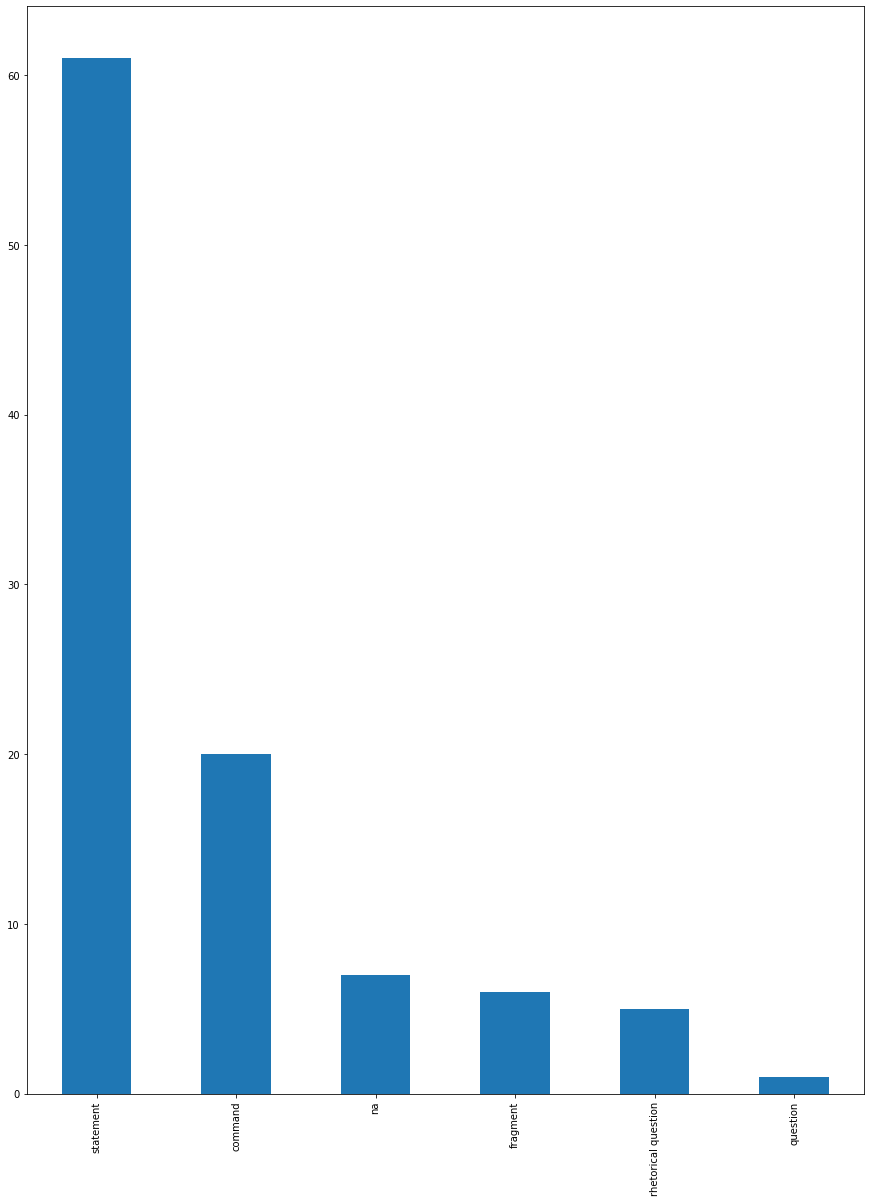

In [ ]:
packt_reviews_sent.iloc[:100].clas.value_counts().plot.bar()

In [ ]:
packt_reviews_sent[packt_reviews_sent.clas == 'fragment'].head(3)

,book_name,book_reviewer_name,book_reviewer_rating,book_reviewer_title,book_reviewer_info,book_reviewer_reviewText,sentences,clas,confc,sentiment0,confs
84,Mastering SaltStack -: Use Salt to the fullest,Amazon Customer,3.0,As expected,Reviewed in the United States 🇺🇸 on 1 November...,As expected,As expected,fragment,0.547011,POSITIVE,0.997447
117,"LEARNING AWS 2/ED: Design, build, and deploy r...",Sarat Chandra Dash,5.0,Good one,Reviewed in India 🇮🇳 on 9 May 2019,Good one,Good one,fragment,0.896900,POSITIVE,0.998824
144,Programming with CodeIgniterMVC,Amazon Customer,1.0,One Star,Reviewed in India 🇮🇳 on 29 October 2017,Useless,Useless,fragment,0.995300,NEGATIVE,0.999297


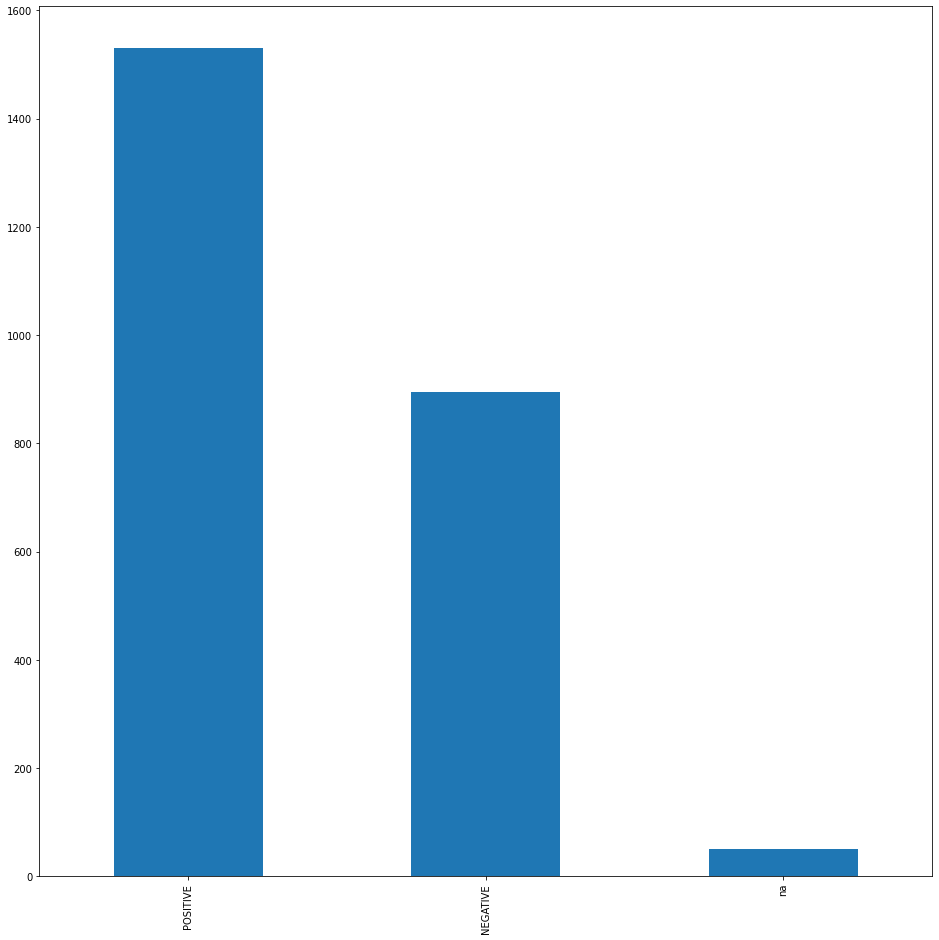

In [ ]:
packt_reviews_sent.sentiment0.value_counts().plot.bar()

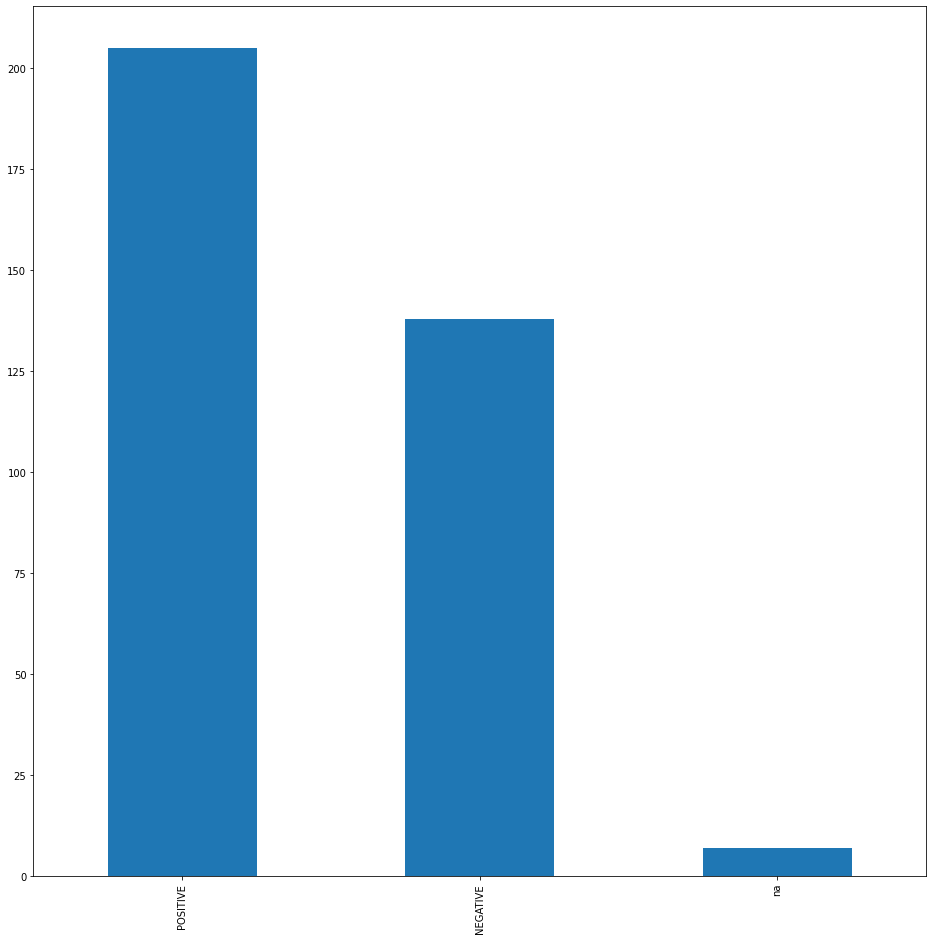

In [ ]:
packt_reviews_sent[packt_reviews_sent.book_reviewer_rating == 4].sentiment0.value_counts().plot.bar()

In [ ]:
packt_reviews_sent[packt_reviews_sent.book_reviewer_rating == 4][packt_reviews_sent.sentiment0 == 'NEGATIVE'].iloc[10].sentences

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


'With that said, so far, the biggest challenge getting through this book as a beginner has been keeping myself motivated when the reading makes such drastic shifts from difficult but approachable topics, to suddenly very dense and mathematical concepts.'

## With that said, so far, the biggest challenge getting through this book as a beginner has been keeping myself motivated when the reading makes such drastic shifts from difficult but approachable topics, to suddenly very dense and mathematical concepts.

In [ ]:
packt_reviews_sent[packt_reviews_sent.book_reviewer_rating == 1][packt_reviews_sent.sentiment0 == 'POSITIVE'].iloc[8].sentences

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


'Unfortunately, these links are broken, rendering this book useless.'